In [1]:
# DATA311 Assignment 1

Enter the filename below:

In [2]:
filename = "UK-Bank-Customers.csv"

Global imports & constants
* you should not need more imports than this

In [3]:
%matplotlib inline
import csv
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [10, 3]

Code below opens the file 'filename' and reads in the data.

In [4]:
#
# insert code that reads in the data

csvfile=[]
csvreader = None;

# csvreader = csv.DictReader(open(filename, "r"))
with open(filename, "r", encoding='UTF-8') as file: 
	csvreader = csv.DictReader(file)
	for row in csvreader:
		csvfile.append(row) #appends row in the list structure to store the csv file
	columns = list(csvreader.fieldnames)

print(columns)

#

['Customer ID', 'Name', 'Surname', 'Gender', 'Age', 'Region', 'Job Classification', 'Date Joined', 'Balance']


Code below computes everything that needs to be computed and stores it in memory.
This code should not print anything.

In [5]:
#
# insert code that computes (in memory):
#  min, max, average, std. dev, most common value, histogram values
# for every column

table = [["Columns", "Min", "Max", "Avg", "Std. Dev.", "Most Common Word"]]

# iteration for 
for column in columns:
	allValues = []
	validValues = []
	hasUnvalid = False
	dataRow = [column]
	for row in csvfile:
		allValues.append(row[column])
		try:
			value = float(row[column])
			validValues.append(value);
		except ValueError:
			hasUnvalid = True

	# Item 1-3
	if hasUnvalid:
		dataRow.append("n/a")
		dataRow.append("n/a")
		dataRow.append("n/a")
	else:
		dataRow.append(min(validValues)) # min value
		dataRow.append(max(validValues)) # max value
		dataRow.append(sum(validValues) / len(validValues)) # average value


	# Item 4
	if len(validValues) >= 2:
		difference = 0
		variance = 0
		standardDeviation = 0
		mean = sum(validValues) / len(validValues)
		for each in validValues:
			difference += (each - mean) ** 2
		variance = difference / len(validValues)
		standardDeviation = variance ** (1 / 2)
		dataRow.append(standardDeviation)
	else:
		dataRow.append('n/a')

	# Item 5
	if len(allValues) > 0:
		mostFrequent = max(set(allValues), key = allValues.count)
		dataRow.append(mostFrequent)
	else:
		dataRow.append("n/a")
	
	# add to table
	table.append(dataRow)



Print the results in a nicely formatted table. Feel free to use the provided print_table() function.
For columns that contain at least one non-numeric value, report 'n/a' in Min/Max/Avg/std.avg columns.

In [6]:
#
# replace the codde below with something that prints out the results
#
def print_table(table):
    longest_cols = [
        (max([len(str(row[i])) for row in table]) + 0) for i in range(len(table[0]))
    ]
    row_format = "|".join([" {:>" + str(longest_col) + "} " for longest_col in longest_cols])
    first = True
    for row in table:
        print(row_format.format(*row))
        if first:
            print((sum(longest_cols) + (len(table[0]) - 0) * 3) * "-")
            first = False

# print above table
print_table(table)

            Columns |         Min |         Max |                Avg |          Std. Dev. | Most Common Word 
--------------------------------------------------------------------------------------------------------------
        Customer ID | 100000001.0 | 400003848.0 | 169683123.59367216 |  88642695.10393307 |        100001928 
               Name |         n/a |         n/a |                n/a |                n/a |            Jason 
            Surname |         n/a |         n/a |                n/a |                n/a |             Kerr 
             Gender |         n/a |         n/a |                n/a |                n/a |             Male 
                Age |        15.0 |        64.0 | 38.611111111111114 |   9.81789779947361 |               34 
             Region |         n/a |         n/a |                n/a |                n/a |          England 
 Job Classification |         n/a |         n/a |                n/a |                n/a |     White Collar 
        D

Colde below displays the histograms for each column (where applicable).

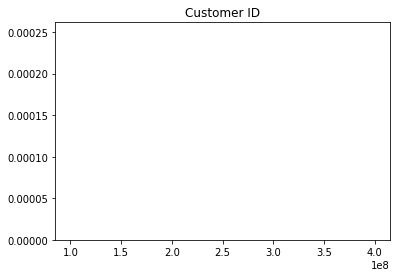

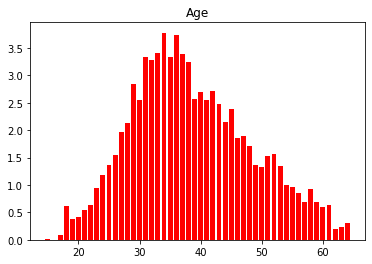

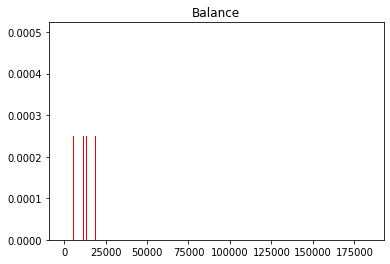

In [7]:
#
# replace the code below with your own code that draws the histograms for each column that contains numeric data

# import random
# columnNames = ["Age", "Savings", "Loan"]
# columns = [[random.random() for i in range(10)] for c in columnNames]

# for c in range(len(columnNames)):
#     x = range(len(columns[c]))
#     plt.bar(x, columns[c], color="red")
#     plt.title(columnNames[c])
#     plt.show()

# graph
for column in columns:
	allValues = []
	hasUnvalid = False;
	for row in csvfile:
		try:
			allValues.append(float(row[column]))
		except ValueError:
			hasUnvalid = True

	if hasUnvalid is False:
		uniqueValue = dict.fromkeys(sorted(set(allValues)), 0) # unique all values and sort and convert into dictonary - key(value name): value(times of presence)
		for key, value in uniqueValue.items():
			uniqueValue[key] = allValues.count(key) / len(uniqueValue.keys());

		plt.bar(uniqueValue.keys(), uniqueValue.values(), color = "red")
		plt.title(column)
		plt.show()